IMPORT THE REQUIRED MODULES AND LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

LOADING THE DATASET AND PRINTING THE FIRST FEW ROWS IN IT

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


GENERAL DETAILS ABOUT THE DATASET

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.duplicated().sum()

0

IDENTIFICATION OF NaN VALUES

In [10]:
nan_values = df.isna().sum().sort_values(ascending=False)
nan_values = nan_values[nan_values > 0]
nan_values

Cabin       687
Age         177
Embarked      2
dtype: int64

DROP THE COLUMN IN WHICH MORE THAN 75% PERCENT OF THE VALUES ARE NaN

In [11]:
df.drop(columns='Cabin', axis=1, inplace=True)

In [12]:
df.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [13]:
df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

BINNING OF VALUES IS PERFORMED

In [14]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values(ascending=True)

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

DROP UNNECESSARY COLUMNS FROM THE DATAFRAME AND PRINT THE SOME GENERAL DETAILS OF THE UPDATED DATAFRAME

In [18]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [19]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


IDENTIFYING THE NUMBER OF PEOPLE FROM EACH GENDER ON-BOARD AND PLOTTING

In [23]:
df_1 = df['Sex'].value_counts()
df_1

Sex
male      577
female    314
Name: count, dtype: int64

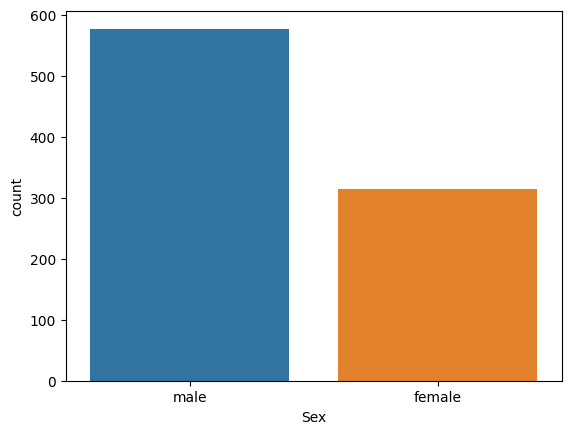

In [24]:
sns.countplot(x=df['Sex'])
plt.show()

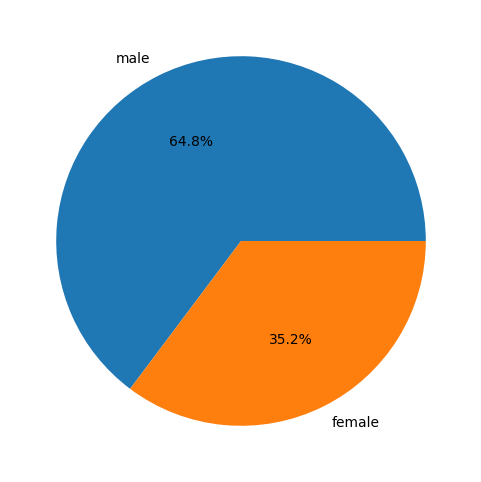

In [25]:
plt.figure(figsize=(6,6))
plt.pie(df_1.values, labels=df_1.index, autopct='%0.1f%%')
plt.show()

GENERATING A PLOT BASED ON GENDER vs NO:OF PEOPLE EMBARKED AND GENDER vs NO:OF PEOPLE SURVIVED

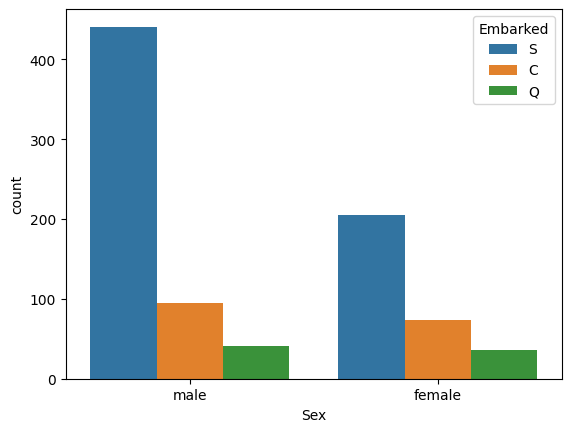

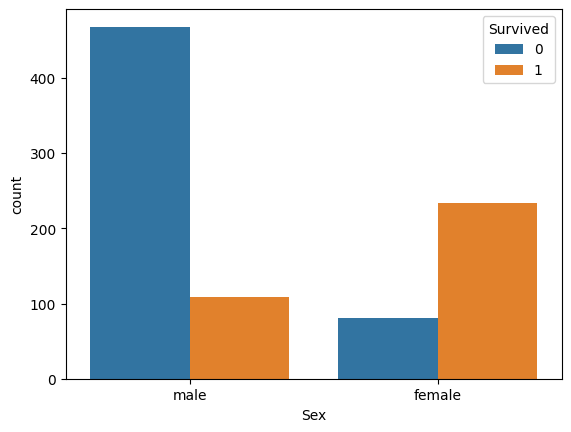

In [26]:
sns.countplot(x=df['Sex'], hue=df['Embarked'])
plt.show()
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.show()

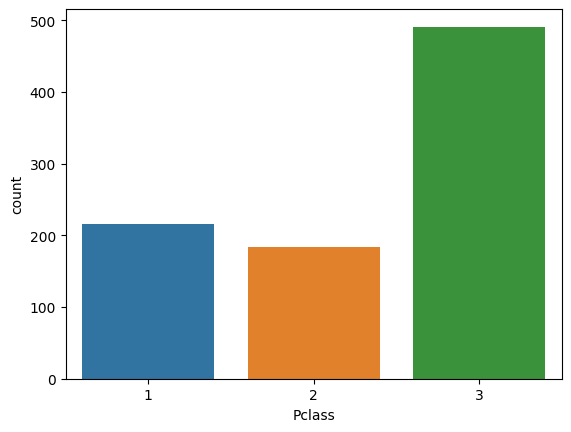

In [27]:
sns.countplot(x=df['Pclass'])
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

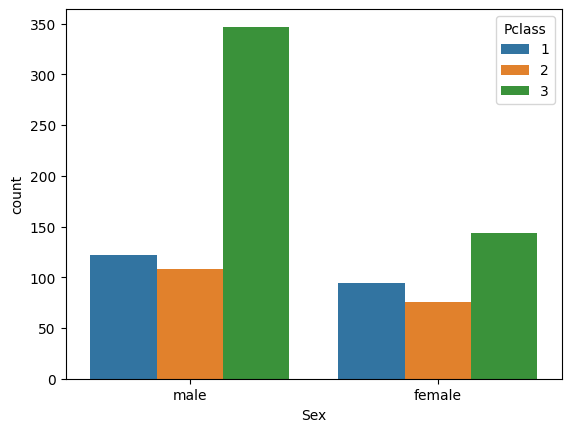

In [28]:
sns.countplot(x=df['Sex'], hue=df['Pclass'])

GENERATE A KDE PLOT FOR AGE

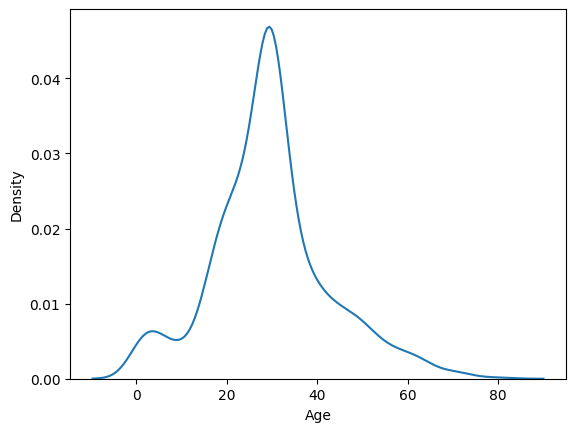

In [29]:
sns.kdeplot(x=df['Age'])
plt.show()

PLOT TO SHOW THE NUMBER OF MEMBERS WHO HAD SURVIVED FROM EACH GENDER

Survived
0    549
1    342
Name: count, dtype: int64


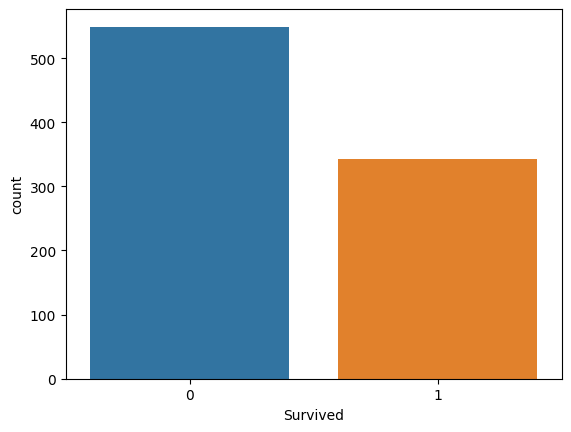

In [30]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])
plt.show()

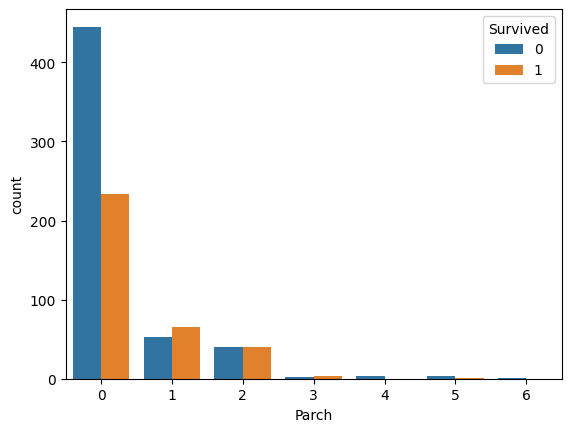

In [31]:
sns.countplot(x=df['Parch'], hue=df['Survived'])
plt.show()

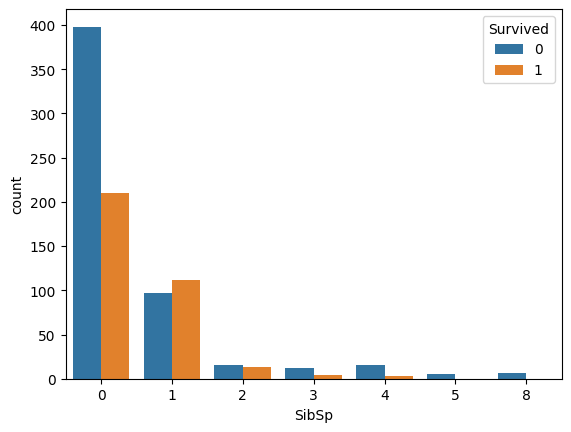

In [32]:
sns.countplot(x=df['SibSp'], hue=df['Survived'])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

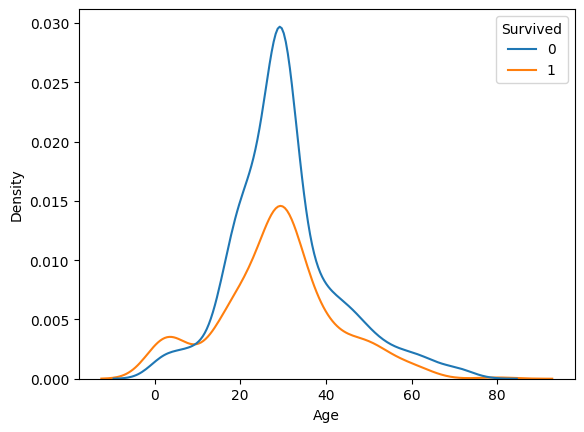

In [33]:
sns.kdeplot(x=df['Age'], hue=df['Survived'])

HISTOGRAM FOR EACH OF THE COLUMNS IN THE DATAFRAME

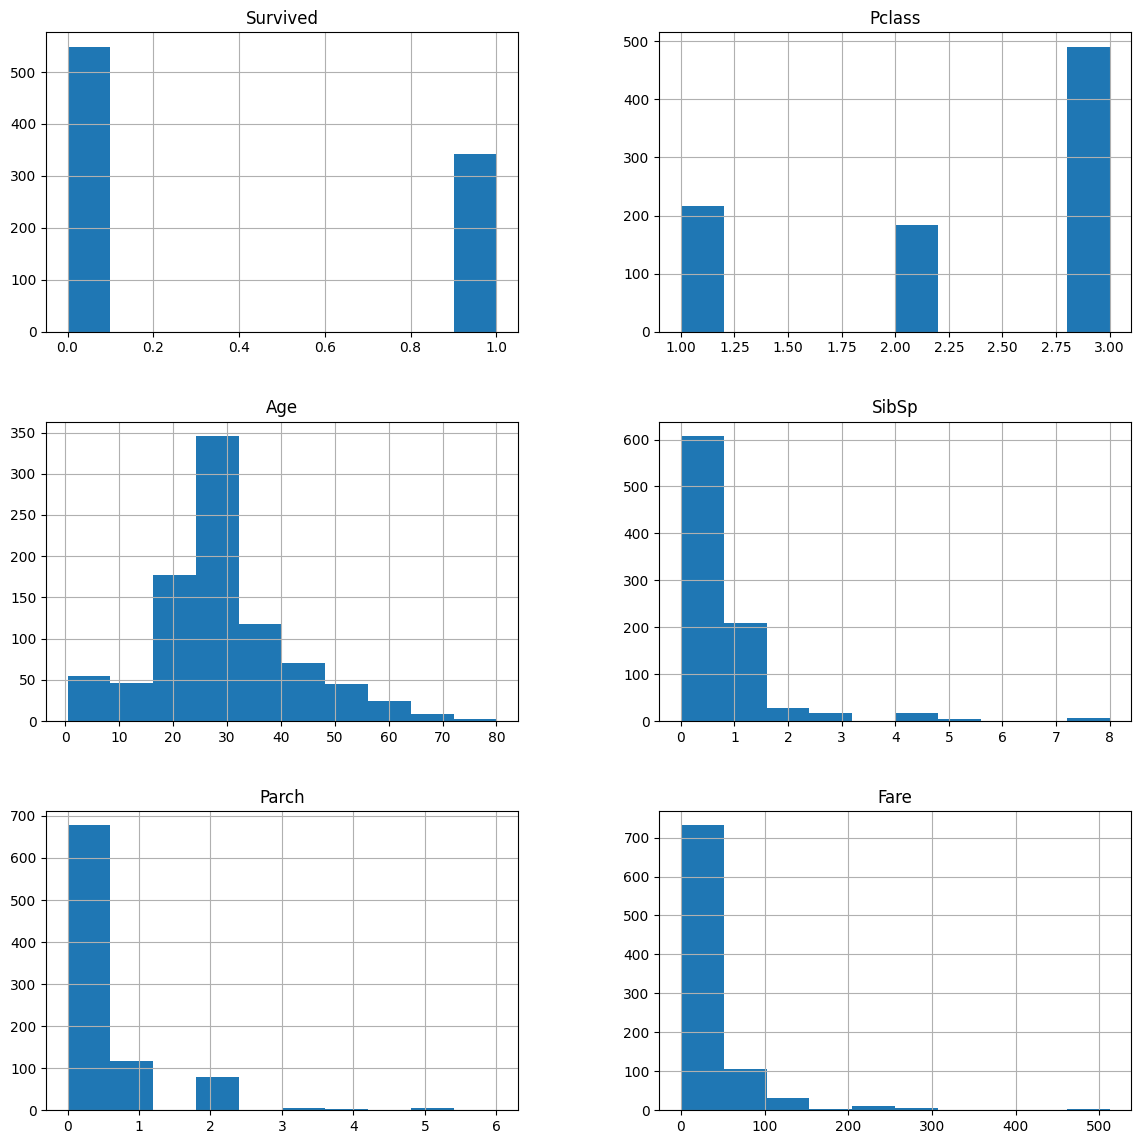

In [34]:
df.hist(figsize=(14,14))
plt.show()

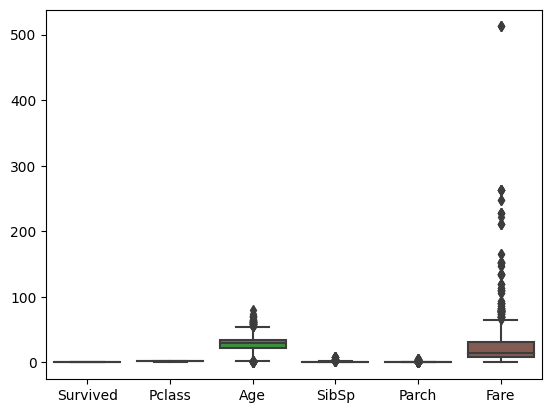

In [35]:
sns.boxplot(df)
plt.show()

ASSIGNING NUMERICAL VALUES FOR NOMINAL VARIABLES [GENDER AND EMBARKED]

In [36]:
df['Sex'] = df['Sex'].replace(['female', 'male'], [0, 1])
df['Embarked'] = df['Embarked'].replace(['C','Q','S'], [1,2,3])

In [37]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


GENERATE A HEAT-MAP USING THE CORRELATION

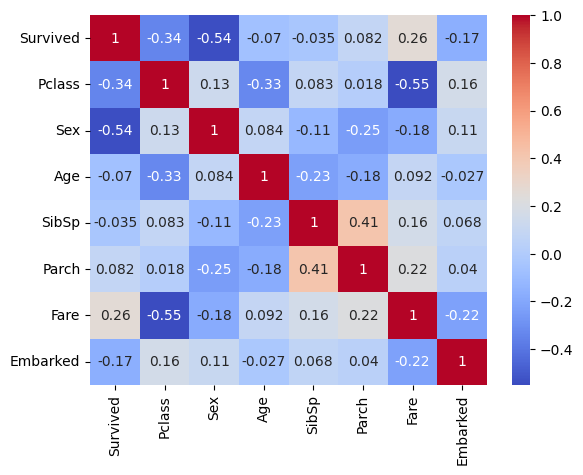

In [38]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

INITIALIZATION AND FITTING OF LABEL ENCODER 

In [39]:
le = LabelEncoder()
for column in ['Embarked', 'Sex']:
    df[column] = le.fit_transform(df[column])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [40]:
columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[columns]
y = df['Survived']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [41]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [42]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [43]:
print(891*0.10)

89.10000000000001


GENERATION OF TESTING(10%) AND TRAINING(90%) SAMPLES

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=6)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


DEFINING NECESSARY FUNCTIONS

In [45]:
def evaluate(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def model_score(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))

INITIALIZATION AND FITTING OF LOGISTIC REGRESSION

In [46]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [47]:
model_score(lr)

Training Score 0.8014981273408239
Testing Score 0.8111111111111111


In [48]:
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)

[1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0]


FIND THE ACCURACY VALUE FOR LOGISTIC REGRESSION

In [49]:
evaluate(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Accuracy Score',accuracy_lr)

Confusion Matrix
 [[53  4]
 [13 20]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.93      0.86        57
           1       0.83      0.61      0.70        33

    accuracy                           0.81        90
   macro avg       0.82      0.77      0.78        90
weighted avg       0.81      0.81      0.80        90

Accuracy Score 0.8111111111111111


INITIALIZATION AND FITTING OF KNN CLASSIFIER

In [50]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [51]:
model_score(knn)

Training Score 0.787765293383271
Testing Score 0.7444444444444445


In [52]:
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

[1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0]


FIND THE ACCURACY VALUE FOR KNN CLASSIFIER

In [53]:
evaluate(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy Score',accuracy_knn)

Confusion Matrix
 [[54  3]
 [20 13]]
Classification Report
               precision    recall  f1-score   support

           0       0.73      0.95      0.82        57
           1       0.81      0.39      0.53        33

    accuracy                           0.74        90
   macro avg       0.77      0.67      0.68        90
weighted avg       0.76      0.74      0.72        90

Accuracy Score 0.7444444444444445


INITIALIZATION AND FITTING OF SUPPORT VECTOR CLASSIFIER

In [54]:
svc = SVC(C=1.0)
svc.fit(x_train, y_train)

SVC()

In [55]:
model_score(svc)

Training Score 0.6816479400749064
Testing Score 0.7


In [56]:
y_pred_svc = svc.predict(x_test)
print(y_pred_svc)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]


FIND THE ACCURACY VALUE FOR SUPPORT VECTOR CLASSIFIER

In [57]:
evaluate(y_test, y_pred_svc)
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print('Accuracy Score',accuracy_svc)

Confusion Matrix
 [[54  3]
 [24  9]]
Classification Report
               precision    recall  f1-score   support

           0       0.69      0.95      0.80        57
           1       0.75      0.27      0.40        33

    accuracy                           0.70        90
   macro avg       0.72      0.61      0.60        90
weighted avg       0.71      0.70      0.65        90

Accuracy Score 0.7


INITIALIZATION AND FITTING OF RANDOM FOREST CLASSIFIER

In [58]:
rfc=RandomForestClassifier(n_estimators=60,criterion='entropy',min_samples_split=6,max_depth=10)
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=6,
                       n_estimators=60)

In [59]:
model_score(rfc)

Training Score 0.9188514357053683
Testing Score 0.8333333333333334


In [60]:
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)

[1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0]


INITIALIZATION AND FITTING OF DECISION TREE CLASSIFIER

In [62]:
dtc = DecisionTreeClassifier(max_depth=10,criterion='entropy',min_samples_split=6)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=6)

FIND THE ACCURACY VALUE FOR RANDOM FOREST CLASSIFIER

In [61]:
evaluate(y_test, y_pred_rfc)
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print('Accuracy Score',accuracy_rfc)

Confusion Matrix
 [[55  2]
 [13 20]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        57
           1       0.91      0.61      0.73        33

    accuracy                           0.83        90
   macro avg       0.86      0.79      0.80        90
weighted avg       0.85      0.83      0.82        90

Accuracy Score 0.8333333333333334


In [63]:
model_score(dtc)

Training Score 0.9176029962546817
Testing Score 0.8333333333333334


In [64]:
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)

[1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0]


FIND THE ACCURACY VALUE FOR DECISION TREE CLASSIFIER

In [65]:
evaluate(y_test, y_pred_dtc)
accuracy_dtc = accuracy_score(y_test,y_pred_dtc)
print('Accuracy Score',accuracy_dtc)

Confusion Matrix
 [[54  3]
 [12 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        57
           1       0.88      0.64      0.74        33

    accuracy                           0.83        90
   macro avg       0.85      0.79      0.81        90
weighted avg       0.84      0.83      0.83        90

Accuracy Score 0.8333333333333334


INITIALIZATION AND FITTING OF ADA BOOST CLASSIFIER

In [66]:
abc  = AdaBoostClassifier(n_estimators=80)
abc.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [67]:
model_score(abc)

Training Score 0.83645443196005
Testing Score 0.8222222222222222


In [71]:
y_pred_abc = abc.predict(x_test)
print(y_pred_abc)

[1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0]


FIND THE ACCURACY VALUE FOR ADA BOOST CLASSIFIER

In [72]:
evaluate(y_test, y_pred_abc)
accuracy_abc = accuracy_score(y_test,y_pred_abc)
print('Accuracy Score',accuracy_abc)

Confusion Matrix
 [[53  4]
 [12 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        57
           1       0.84      0.64      0.72        33

    accuracy                           0.82        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.82      0.82      0.82        90

Accuracy Score 0.8222222222222222


ARRANGING ALL ACCURACY VALUES GENERATED BY DIFFERENT REGRESSION AND CLASSIFICATION MODEL IN DESCENDING ORDER

In [73]:
models = pd.DataFrame({'Model': ['Ada Boost Classifier','Decision Tree Classifier','knn','Logistic Regression','Random Forest Classifier','SVC'],'Score': [accuracy_abc, accuracy_dtc, accuracy_knn, accuracy_lr, accuracy_rfc, accuracy_svc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree Classifier,0.833333
4,Random Forest Classifier,0.833333
0,Ada Boost Classifier,0.822222
3,Logistic Regression,0.811111
2,knn,0.744444
5,SVC,0.700000


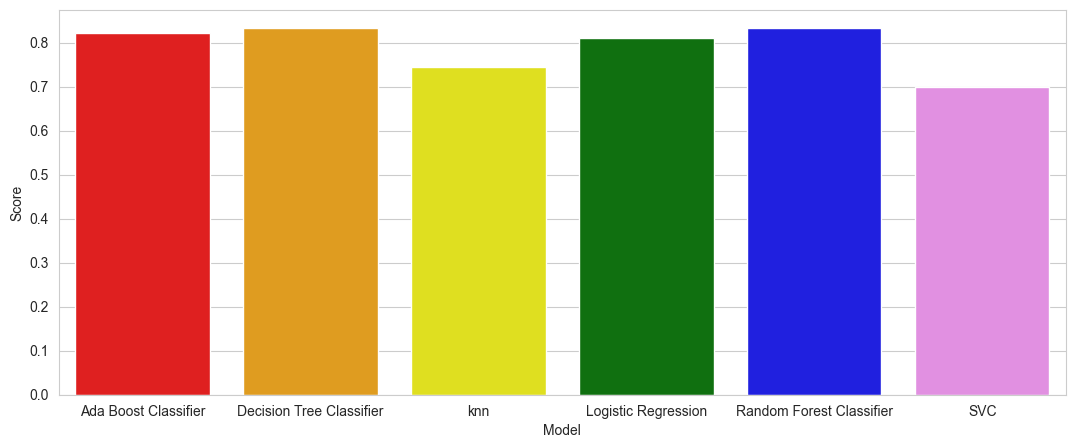

In [74]:
colors = ["red", "orange", "yellow", "green","blue","violet"]

sns.set_style("whitegrid")
plt.figure(figsize=(13,5))
plt.ylabel("Accuracy in Percentage (%)")
plt.xlabel("Names of The Algorithms Used")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [85]:
print('The most accurate classifier is : ')
print(models.sort_values(by='Score').loc[1])

The most accurate classifier is : 
Model    Decision Tree Classifier
Score                    0.833333
Name: 1, dtype: object


THANK YOU !!